# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [1]:
# 1. Load the ./data/college_completion.csv data with Pandas.

import pandas as pd
df = pd.read_csv('./data/college_completion.csv')

In [16]:
# 2. What are are the dimensions of the data? 
# How many observations are there? 
# What are the variables included? 
# Use .head() to examine the first few rows of data.

# Dimension of the data: 3798 x 63
# Observations: 3798
# There are 62 variables (not counting index), including chronname, city, state, level, control, whether it is a hbcu, etc.
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [18]:
# 3. Cross tabulate control and level. Describe the patterns you see.

control_level_cross_tabulate = pd.crosstab(df['control'], df['level'])
control_level_cross_tabulate

# Seems like most 2-year colleges are public, while most 4-year colleges are private and not-for-profit

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


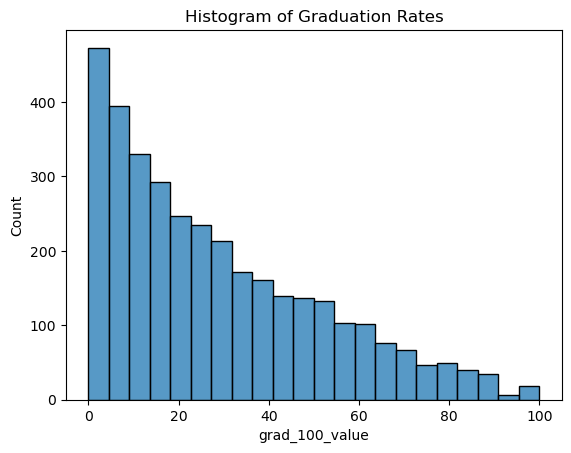

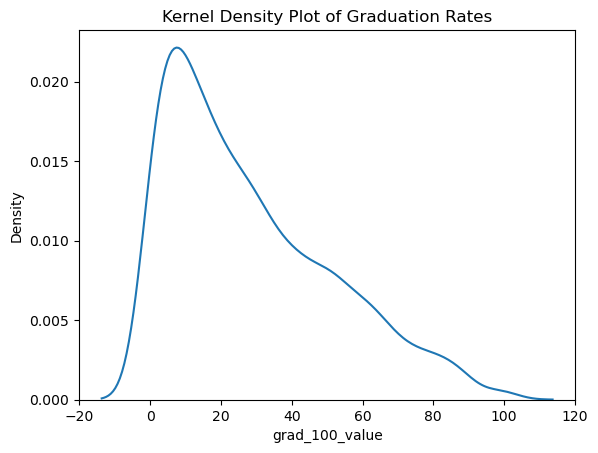

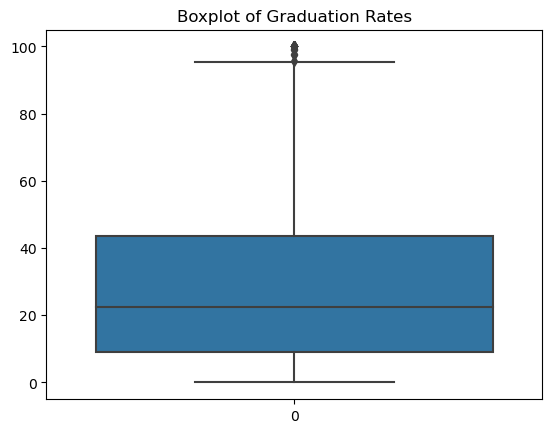

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [27]:
# 4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
sns.histplot(df['grad_100_value'])
plt.title('Histogram of Graduation Rates')
plt.show()

# Kernel density plot
sns.kdeplot(df['grad_100_value'])
plt.title('Kernel Density Plot of Graduation Rates')
plt.show()

# Boxplot
sns.boxplot(df['grad_100_value'])
plt.title('Boxplot of Graduation Rates')
plt.show()

# Statistical description
df['grad_100_value'].describe()


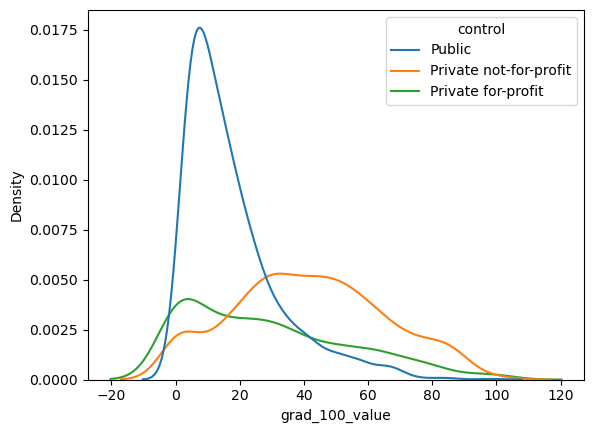

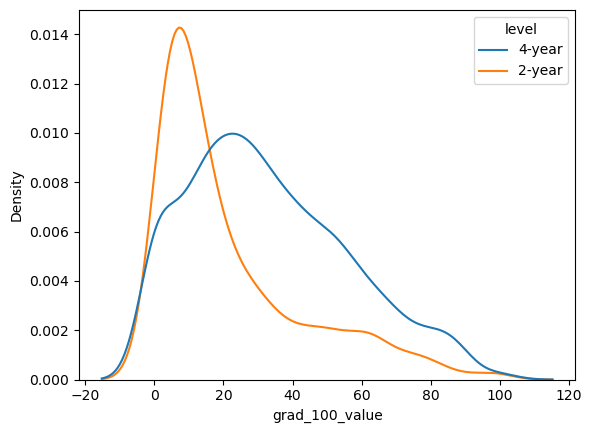

(                       grad_100_value                                          \
                                 count       mean        std  min    25%   50%   
 control                                                                         
 Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
 Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
 Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   
 
                                       
                           75%    max  
 control                               
 Private for-profit      46.75  100.0  
 Private not-for-profit  58.30  100.0  
 Public                  23.25   97.8  ,
        grad_100_value                                                      
                 count       mean        std  min   25%   50%     75%    max
 level                                                                      
 2-year         1455.0  21.636151 

In [35]:
# 5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. 
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. 
# Which institutions appear to have the best graduation rates?

sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.show()

sns.kdeplot(data=df,x='grad_100_value',hue='level')
plt.show()
# Seems like the plot are similar to each other based on the highest count between level and control
# We saw that most 2-year colleges are public, while most 4-year colleges are private and not-for-profit
# We see similarity in the shape of the plot for those of the highest count between level and control

control_stats = df.loc[:,['control','grad_100_value']].groupby('control').describe()
level_stats = df.loc[:,['level','grad_100_value']].groupby('level').describe()
control_stats, level_stats
# Seems like private not-for-profit institutions and 4-year institutions appear to have the best average graduation rate

<Axes: xlabel='grad_100_value', ylabel='Density'>

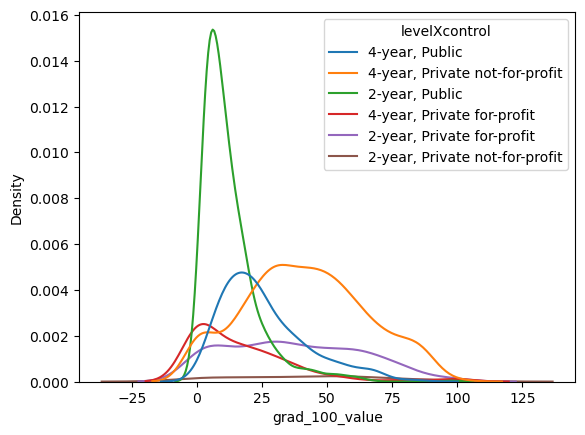

In [37]:
# 6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. 
# Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

df['levelXcontrol'] = df['level']+', '+df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')
# Seems like in terms of average graduation rate, the best rate lies with 4-year private not-for-profit and 2-year proviate not-for-profit institutions
# since they have similar high mean values for grad_100_value

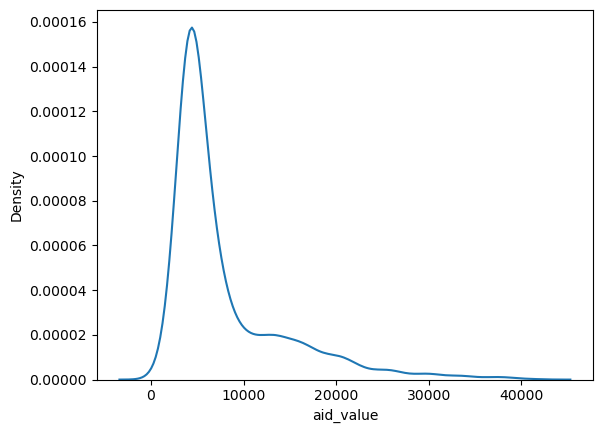

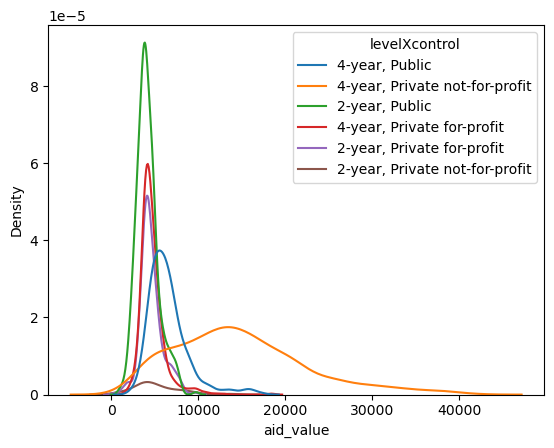

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [44]:
# 7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? 
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

import numpy as np

sns.kdeplot(df['aid_value'])
plt.show()

sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol')
plt.show()
# The shape of the aid_value density plot seems to be the combination of all plots in the levelXcontrol plot.

df.groupby(['level', 'control'])['aid_value'].describe()

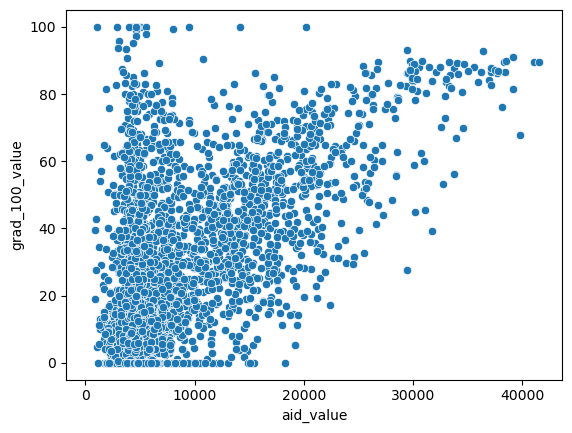

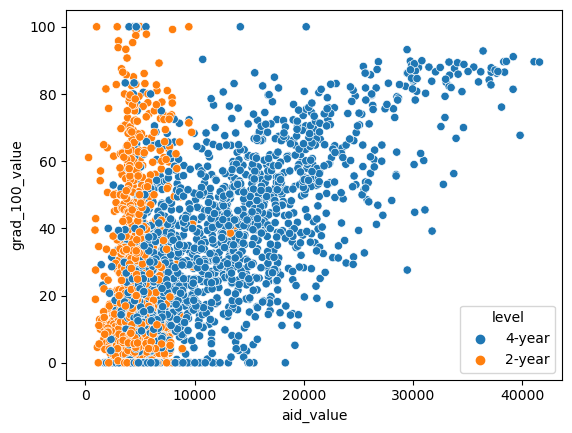

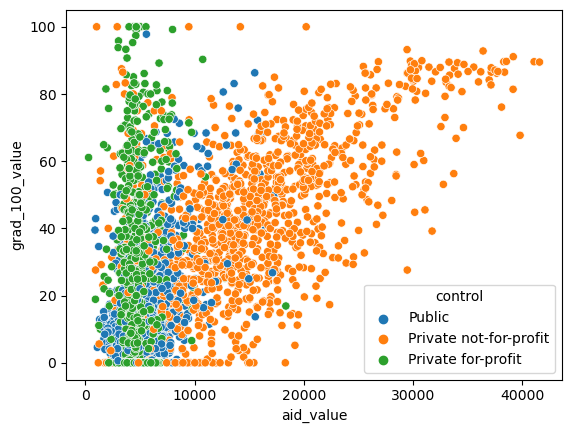

In [46]:
# 8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. 
# Now make the same plot, grouping by level and then control. Describe what you see. 
# For which kinds of institutions does aid seem to increase graduation rates?

sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.show()
# There seems to be 2 groups of correlation here- one that has a positive correlation between grad_100_value and aid_value, and one where 
# grad_100_value increases, but aid_value remains the same

sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.show()
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.show()
# Now it's more clear. For level, the one that exhibits the positive correlation is a level of 4-year while the one that remains relatively constant
# regardless of the grad_100_value is level of 2-year.
# As for control, it's more so the private not-for-profit institutions that have a positive correlation, while the public and private for-profit
# institutions do not have a visible correlation/stays relatively constant.


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. I will be using this data: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

2. Missing values in this data is marked as mission/inapplicable or the likes. For categorical variables, all of its values are converted to a value code, and these value codes/missing value codes are described in the data dictionary. It doesn't really say how numeric variables are handled. I feel like this data is somewhat inconsistent, because there are several different value code for "missing". 

3. Interesting variables:
- PUFFWGT: allow for analysis that is representative of the entire population of Medicare beneficiaries who were ever enrolled in any given calendar year
- DEM_INCOME: income group
- DEM_AGE: basic essential fundamental information for this case
- DEM_SEX: gender differences may include healthcare needs and outcomes
- HLT_BMI_CAT: BMI is an important indicator in health
- HLT_DIAMEDS: medication usage can provide information on disease management
- PRV_BPTAKEN: bp monitoring is important in health

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('sfpuf2021_1_fall.csv', low_memory=False)

# check if any null values left
# df.isnull().sum() 

# df['PUFFWGT'].value_counts()

# replace income values with its corresponding value code match
df['DEM_INCOME'].value_counts()
df.replace({'DEM_INCOME': {1: '<$25,000', 2: '>=$25,000'}}, inplace=True)

# replace age values with its corresponding value code match
df['DEM_AGE'].value_counts()
df.replace({'DEM_AGE': {1: 'Age <65 years', 2: 'Age 65-74 years', 3: 'Age 75+ years'}}, inplace=True)

# replace sex values with its corresponding value code match
df['DEM_SEX'].value_counts()
df.replace({'DEM_SEX': {1: 'Male', 2: 'Female'}}, inplace=True)

# replace bmi cat values with its corresponding value code match
# df['HLT_BMI_CAT'].value_counts()
df.replace({'HLT_BMI_CAT': {1: 'Underweight/healthy, <25', 2: 'Overweight, 25-<30', 3: 'Obese/high-risk obese, >=30'}}, inplace=True)

# need to replace D with nan, since value code D = don't know
# replace hlt diameds values with its corresponding value code match
df.replace({'HLT_DIAMEDS': {'D': np.nan, 1: 'Yes', 2: 'No'}}, inplace=True)
# df['HLT_DIAMEDS'].value_counts()


4. Box plot/bar graphs:

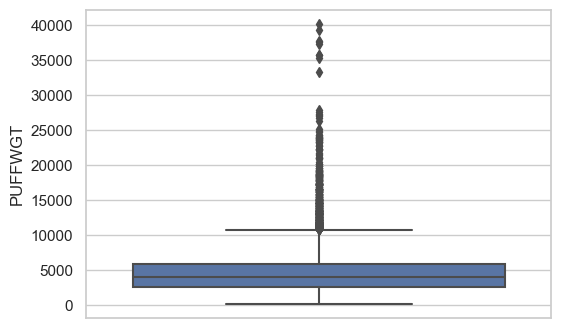

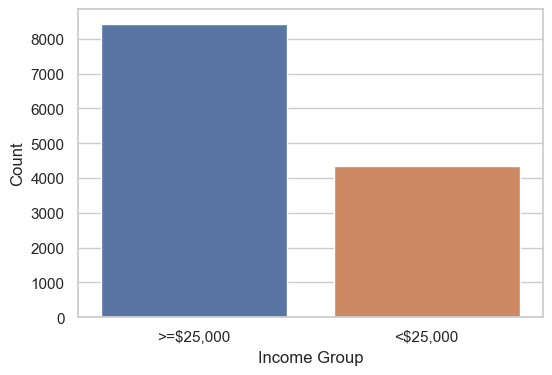

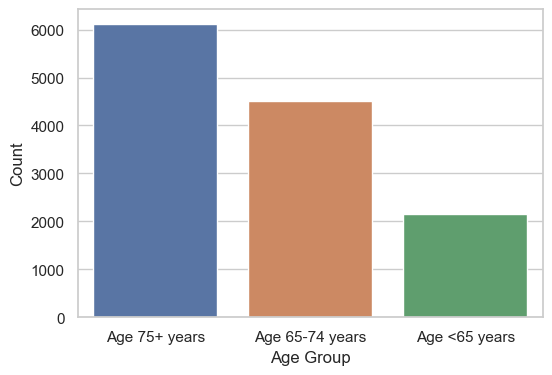

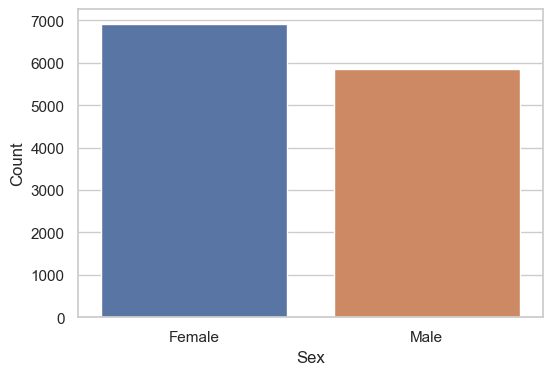

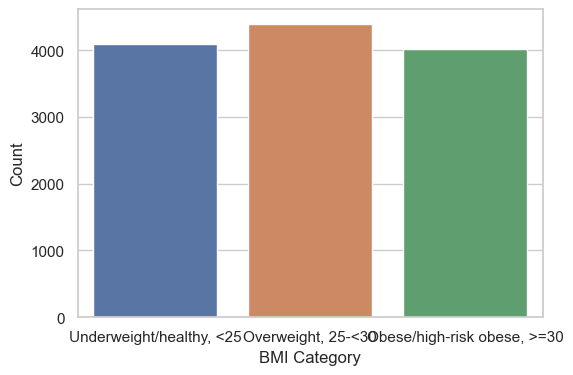

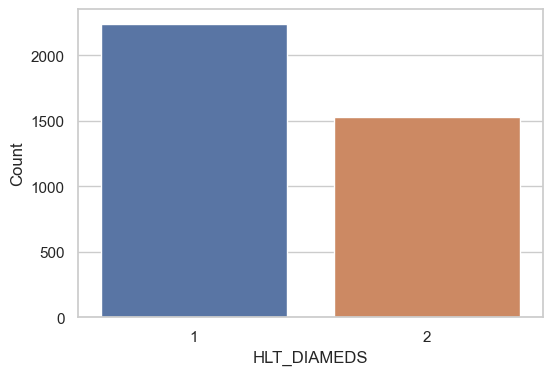

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for PUFFWGT
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['PUFFWGT'])
# plt.title('Boxplot of Population of Medicare Beneficiaries')
plt.ylabel('PUFFWGT')
plt.show()

# Bar graph for DEM_INCOME
plt.figure(figsize=(6, 4))
sns.countplot(x='DEM_INCOME', data=df)
# plt.title('Age Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

# Bar graph for DEM_AGE
plt.figure(figsize=(6, 4))
sns.countplot(x='DEM_AGE', data=df)
# plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Bar graph for DEM_SEX
plt.figure(figsize=(6, 4))
sns.countplot(x='DEM_SEX', data=df)
# plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Bar graph for HLT_BMI_CAT
plt.figure(figsize=(6, 4))
sns.countplot(x='HLT_BMI_CAT', data=df)
# plt.title('BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

# Bar graph for HLT_DIAMEDS
plt.figure(figsize=(6, 4))
sns.countplot(x='HLT_DIAMEDS', data=df)
# plt.title('Gender Distribution')
plt.xlabel('HLT_DIAMEDS')
plt.ylabel('Count')
plt.show()


# There seems to be several outliers in the PUFFWGT data that are primarily in the higher values. 
# As for categorical data, there doesn't seem to be any outliers.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

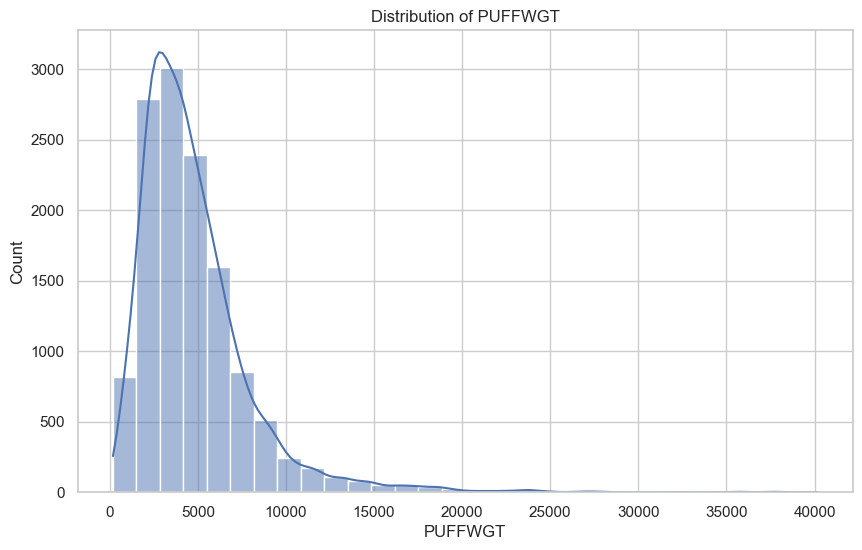

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PUFFWGT'], bins=30, kde=True)
plt.title('Distribution of PUFFWGT')
plt.xlabel('PUFFWGT')
plt.ylabel('Count')
plt.show()

# For PUFFWGT, because it was mentioned above that it contained outliers on the higher end of the data range, the histogram
# for this data is skewed to the right. There's no transformations needed to rescale this.

6. Create a scatter plot, and describe the relationship you see.

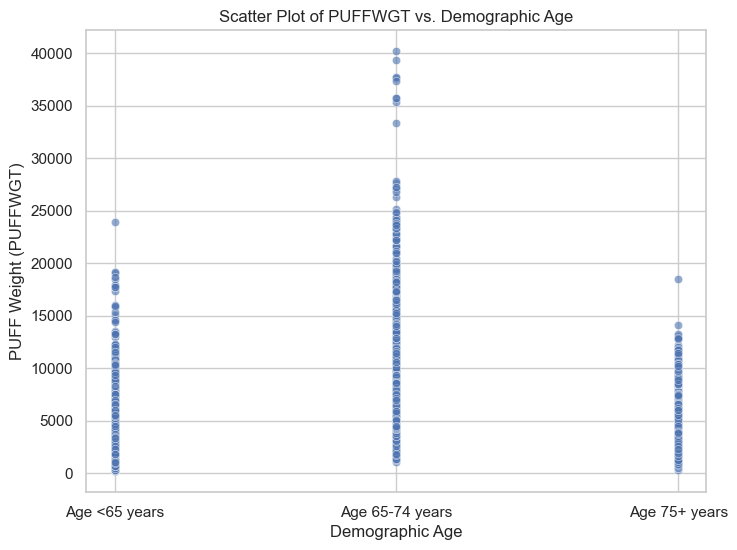

In [42]:
age_mapping = {'Age <65 years': 1, 'Age 65-74 years': 2, 'Age 75+ years': 3}
df['DEM_AGE_num'] = df['DEM_AGE'].map(age_mapping)

scatter_df = df[['DEM_AGE_num', 'PUFFWGT']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='DEM_AGE_num', y='PUFFWGT', data=scatter_df, alpha=0.6)

plt.xticks(ticks=[1, 2, 3], labels=['Age <65 years', 'Age 65-74 years', 'Age 75+ years'])

plt.title('Scatter Plot of PUFFWGT vs. Demographic Age')
plt.xlabel('Demographic Age')
plt.ylabel('PUFF Weight (PUFFWGT)')

plt.show()

# Seems like for age range between 65-74, there are more outliers or that the PUFFWGT is higher on average as compared to the other age groups.

7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [45]:
# Cross-tabulation between DEM_AGE and DEM_SEX
pd.crosstab(df['HLT_BMI_CAT'], df['DEM_AGE'], margins=True, margins_name="Total")

# In terms of DEM_AGE and HLT_BMI_CAT, those in the age group of <65 tend to be more obese/high-risk obese with a BMI of over 30
# Those in the age group of 

DEM_AGE,Age 65-74 years,Age 75+ years,Age <65 years,Total
HLT_BMI_CAT,,,,
"Obese/high-risk obese, >=30",1584,1393,1039,4016
"Overweight, 25-<30",1607,2239,553,4399
"Underweight/healthy, <25",1228,2359,507,4094
Total,4419,5991,2099,12509
